In [ ]:
"""
날짜 : 2021/02/08
이름 : 김은표
내용 : 딥러닝 CNN 이미지 분류 실습하기
"""

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.model_selection import train_test_split
from PIL import Image
tf.__version__

'2.4.1'

In [ ]:
#학습데이터 로드
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
#데이터 형태 확인
print(cifar_train_data.shape)
print(cifar_train_label[49999][0])
cifar_train_label

(50000, 32, 32, 3)
1


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

[16140  3245 35894 46018  6214 20048 28549 41978 25867]


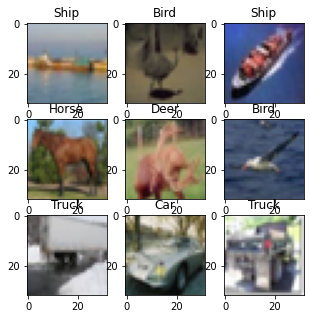

In [ ]:
#데이터 이미지 확인
data_labes = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  
  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title('%s' % data_labes[label])

In [ ]:
#데이터의 레이블을 범주형(One-hot encoding) 형태로 변환
cifar_train_label = to_categorical(cifar_train_label)
cifar_test_label = to_categorical(cifar_test_label)

In [ ]:
#학습모델 설계
model = Sequential()

#CNN층
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

#DNN(FCNN : Full Connection Neural Network)
model.add(Flatten())
model.add(Dense(256, activation='relu'))    #은닉층
model.add(Dense(10, activation='softmax'))  #출력층

#모델 요약확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
#학습모델 설정
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#학습하기
model.fit(cifar_train_data, 
          cifar_train_label, 
          epochs=30, 
          batch_size=128)

Epoch 1/30
391/391 [==============================] - 13s 15ms/step - loss: 3.5431 - acc: 0.2260
Epoch 2/30
391/391 [==============================] - 6s 15ms/step - loss: 1.3944 - acc: 0.4951
Epoch 3/30
391/391 [==============================] - 6s 15ms/step - loss: 1.1312 - acc: 0.5978
Epoch 4/30
391/391 [==============================] - 6s 15ms/step - loss: 1.0007 - acc: 0.6453
Epoch 5/30
391/391 [==============================] - 6s 15ms/step - loss: 0.8831 - acc: 0.6881
Epoch 6/30
391/391 [==============================] - 6s 15ms/step - loss: 0.8061 - acc: 0.7166
Epoch 7/30
391/391 [==============================] - 6s 15ms/step - loss: 0.7489 - acc: 0.7391
Epoch 8/30
391/391 [==============================] - 6s 15ms/step - loss: 0.6972 - acc: 0.7549
Epoch 9/30
391/391 [==============================] - 6s 15ms/step - loss: 0.6718 - acc: 0.7653
Epoch 10/30
391/391 [==============================] - 6s 15ms/step - loss: 0.6160 - acc: 0.7842
Epoch 11/30
391/391 [=================

In [ ]:
#평가하기
model.evaluate(cifar_test_data, cifar_test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.7410 - acc: 0.7880


[0.741020917892456, 0.7879999876022339]

In [ ]:
#테스트하기
from sklearn.metrics import accuracy_score

result = model.predict(cifar_test_data)
result.round()

for i in range(9):
  print('i : ', i)
  print('결과 :', result[i].round())
  print('정답 :', cifar_test_label[i])

array([[176, 191, 225],
       [173, 188, 222],
       [174, 189, 222],
       [173, 188, 221],
       [172, 187, 221],
       [172, 187, 221],
       [172, 188, 221],
       [172, 188, 221],
       [172, 188, 221],
       [172, 188, 221],
       [172, 188, 221],
       [173, 188, 221],
       [173, 188, 222],
       [173, 188, 222],
       [173, 188, 222],
       [173, 188, 222],
       [173, 188, 223],
       [173, 187, 224],
       [173, 187, 224],
       [173, 187, 224],
       [173, 187, 222],
       [172, 187, 221],
       [172, 187, 221],
       [172, 188, 221],
       [172, 188, 221],
       [172, 188, 221],
       [172, 187, 221],
       [172, 187, 221],
       [171, 188, 221],
       [172, 188, 222],
       [177, 178, 213],
       [175, 170, 201]], dtype=uint8)

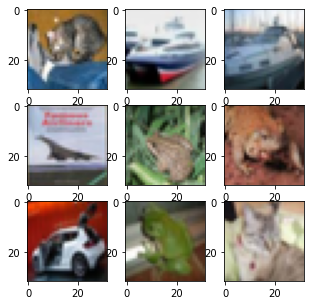

In [ ]:
plt.figure(figsize=(5, 5))

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(cifar_test_data[i])

plt.show()